## Programming Assignment 1
### Enrico Absin
#### 1. Create a Correlation Plot

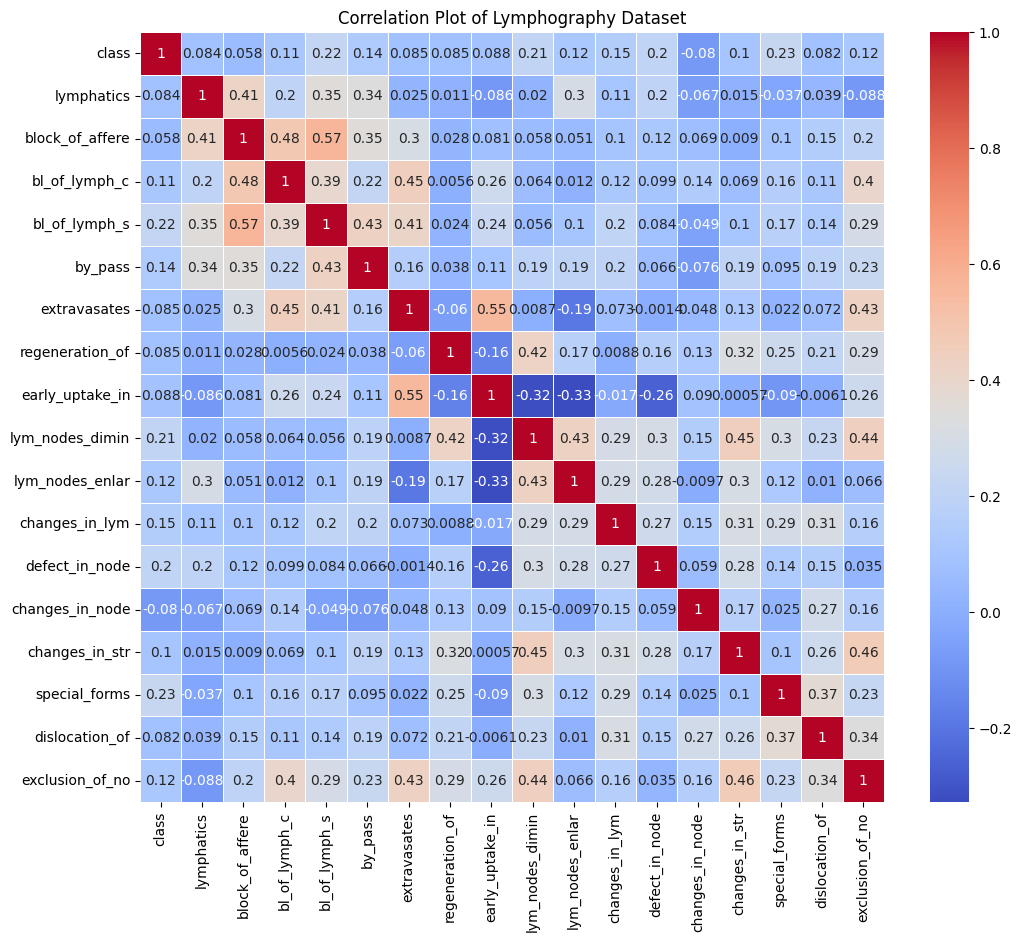

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds = 'lymphography.data'
columns = ['class', 'lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 
           'extravasates', 'regeneration_of', 'early_uptake_in', 'lym_nodes_dimin', 'lym_nodes_enlar', 
           'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_str', 'special_forms', 
           'dislocation_of', 'exclusion_of_no']
data = pd.read_csv(ds, names=columns)
correlation = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot of Lymphography Dataset')
plt.show()

#### 2. Check the distribution of each column and determine which probability distiribution it fits.

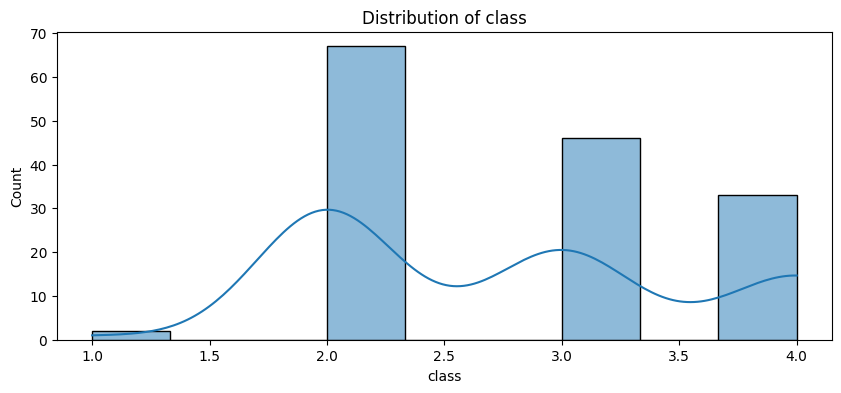

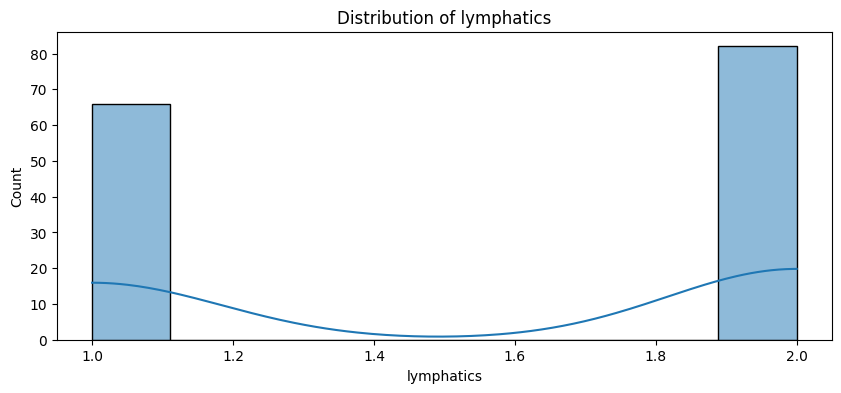

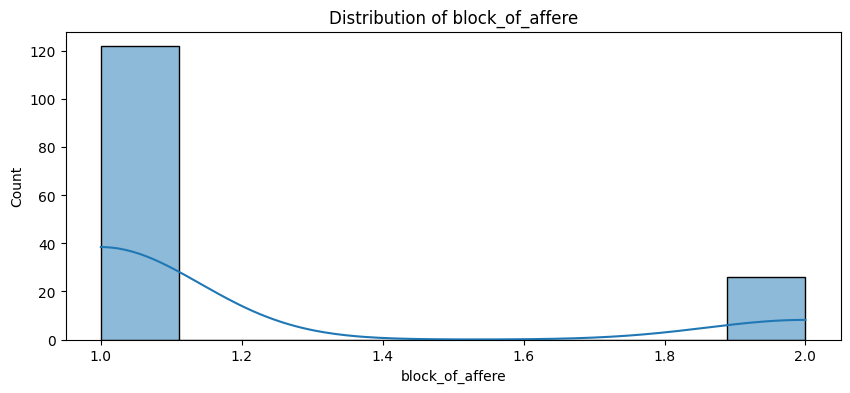

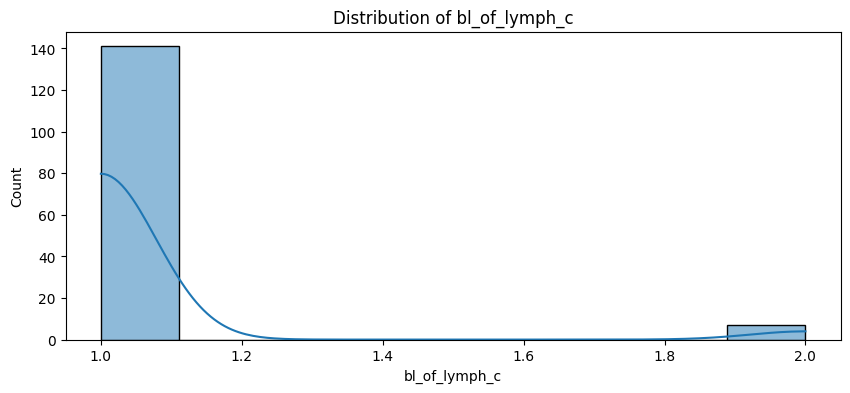

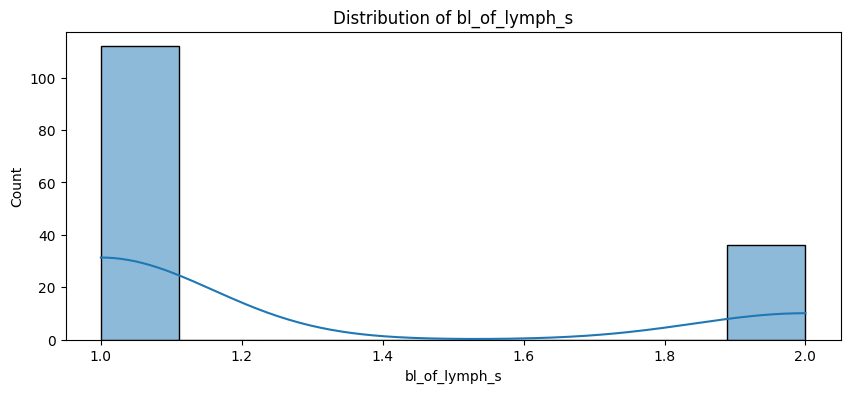

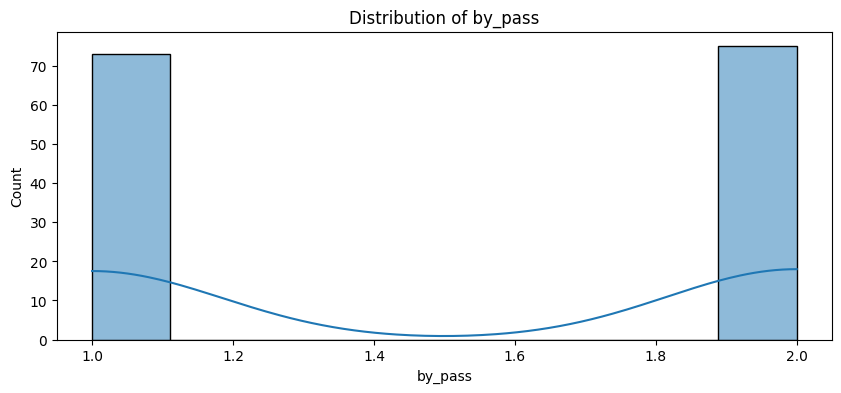

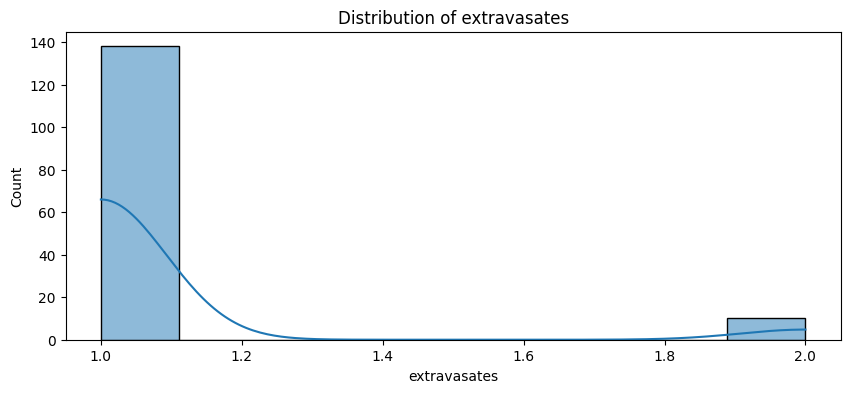

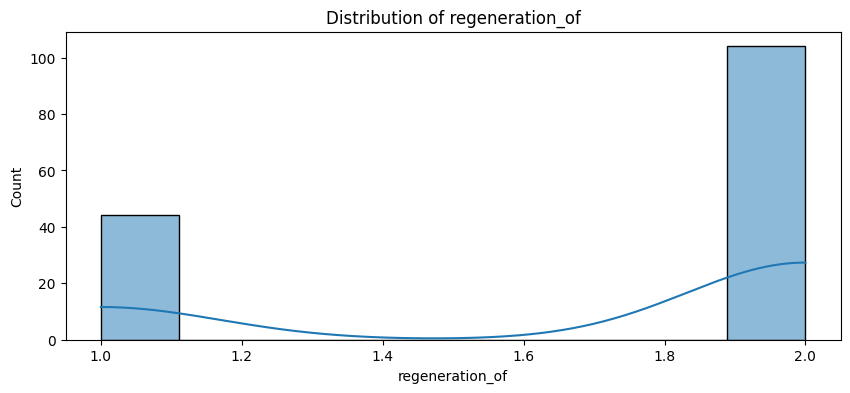

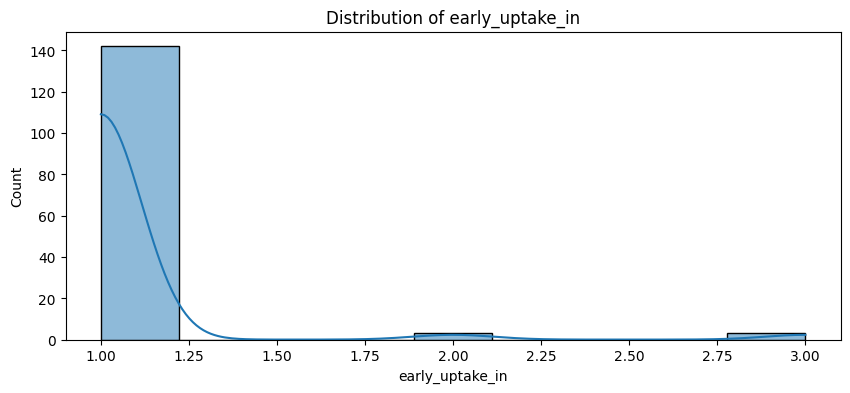

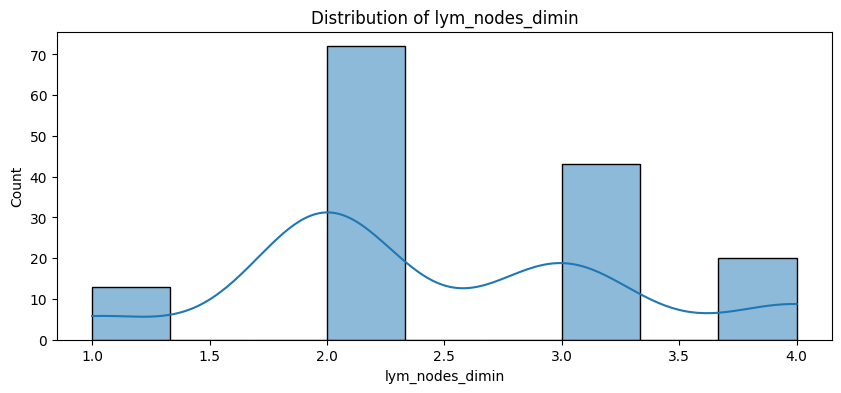

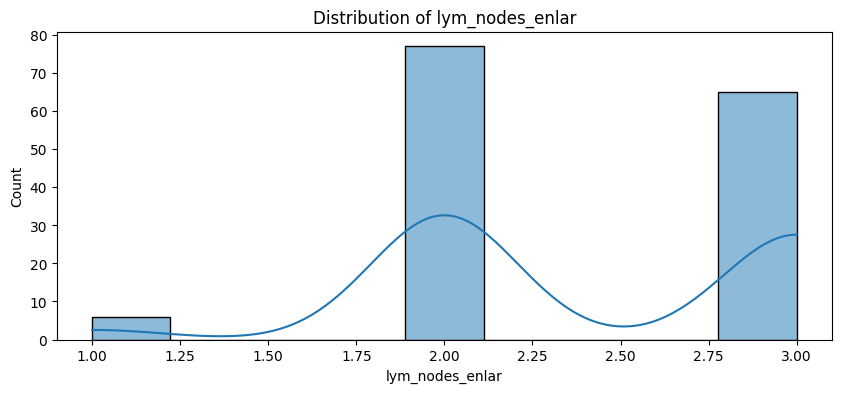

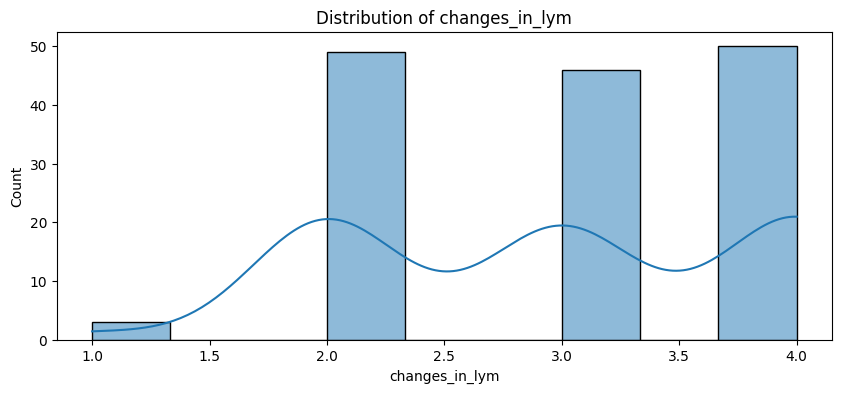

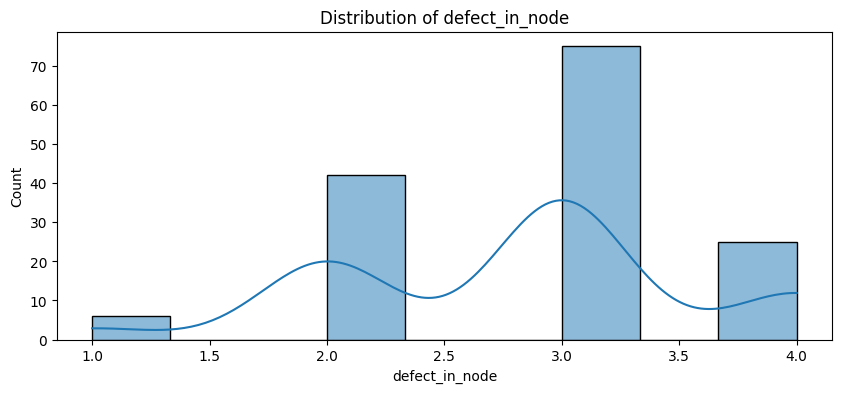

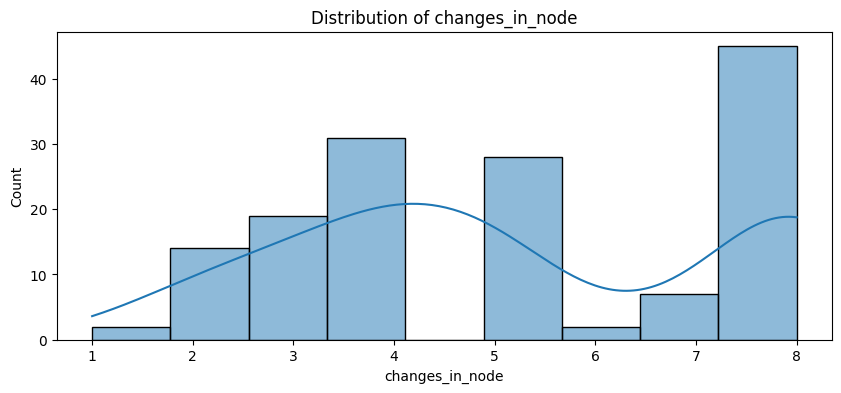

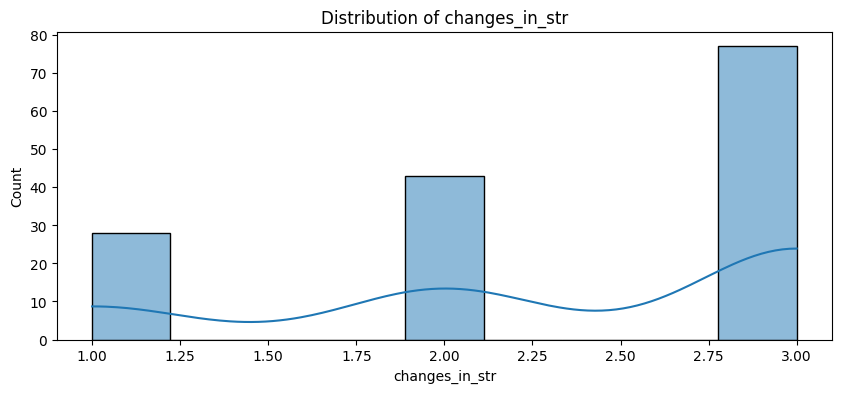

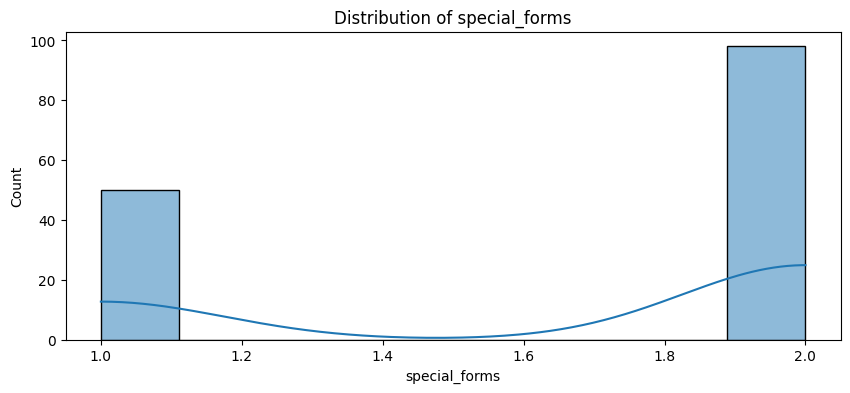

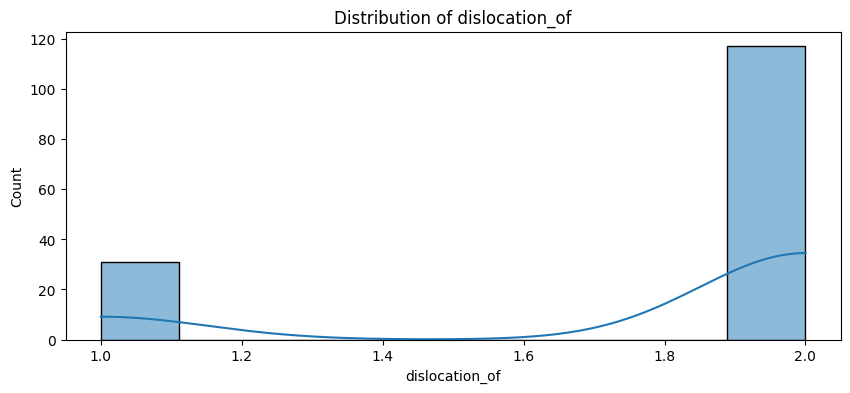

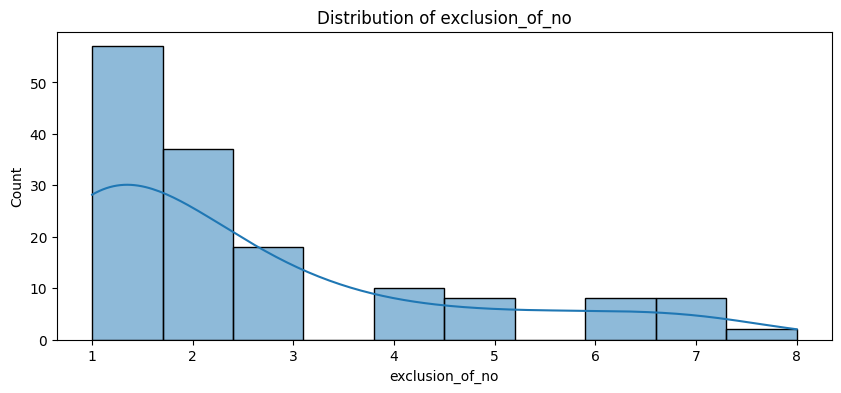

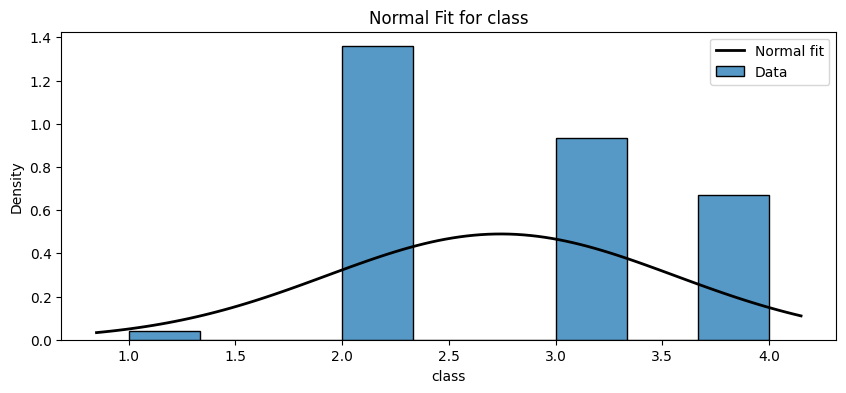

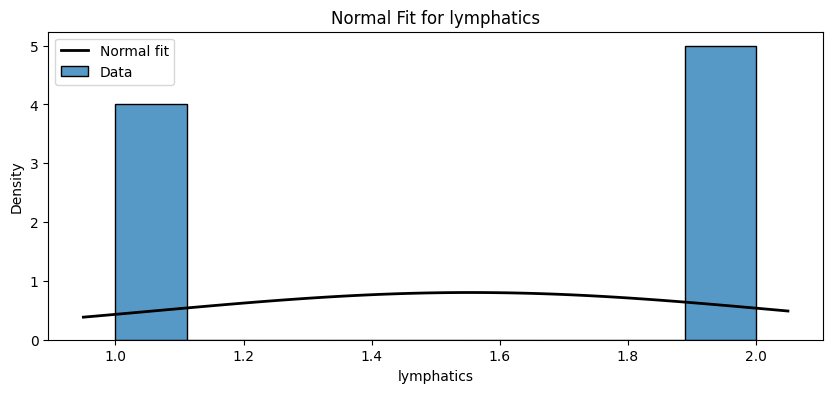

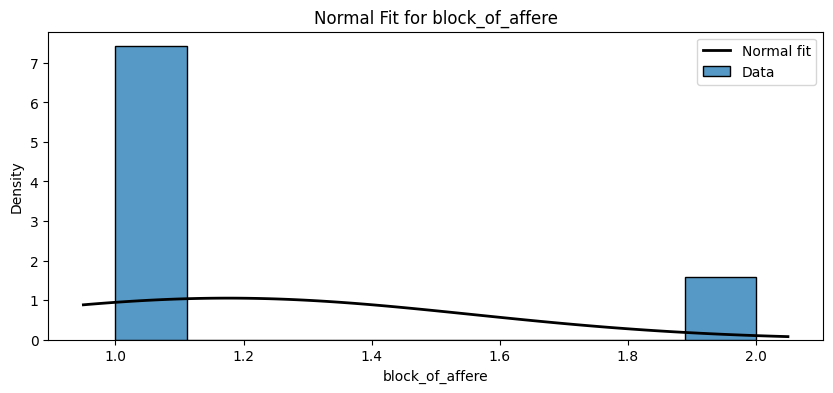

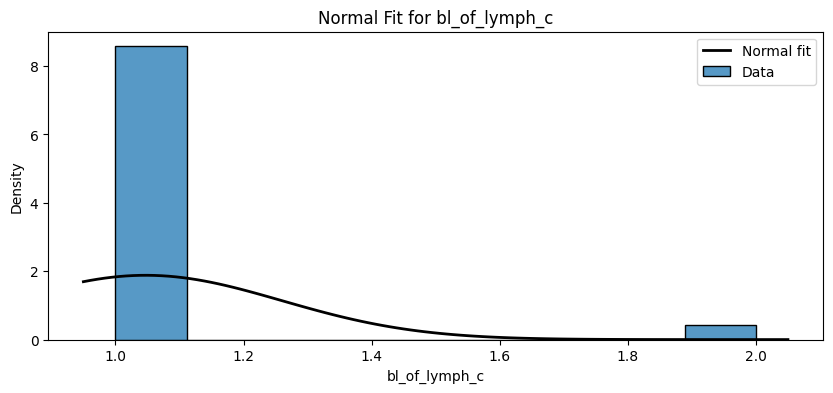

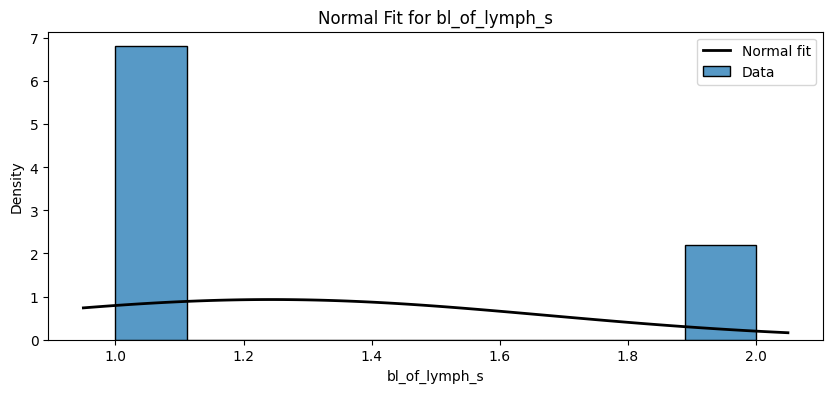

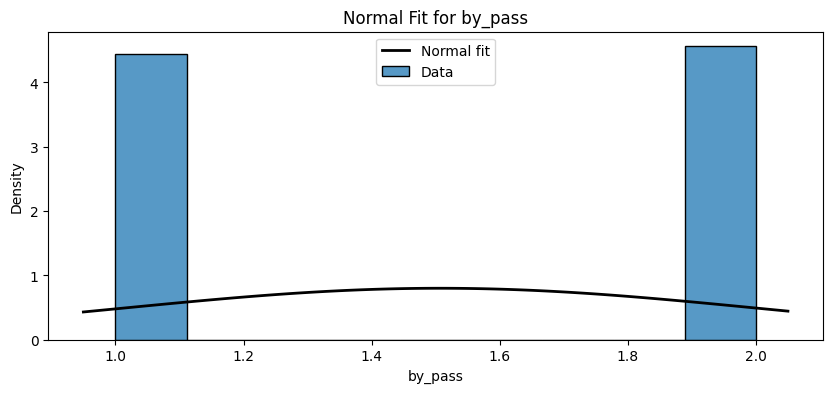

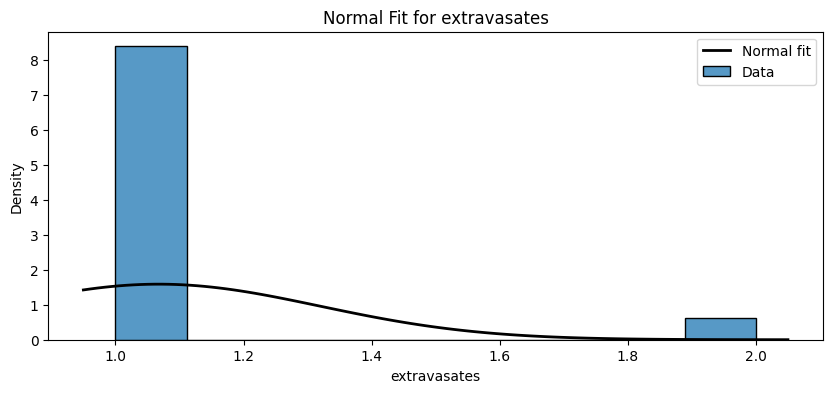

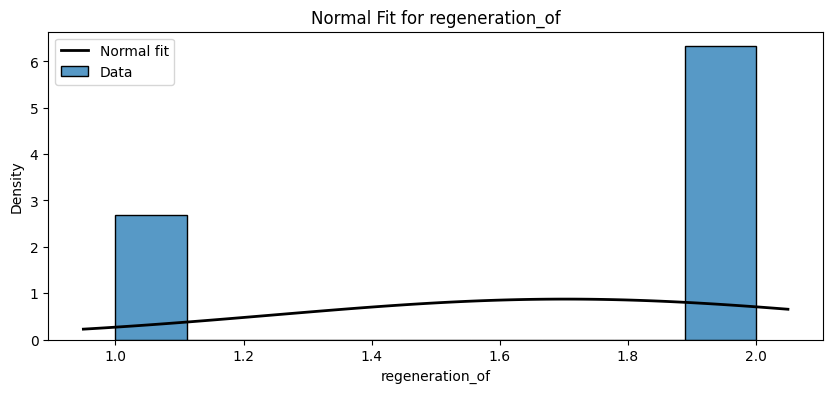

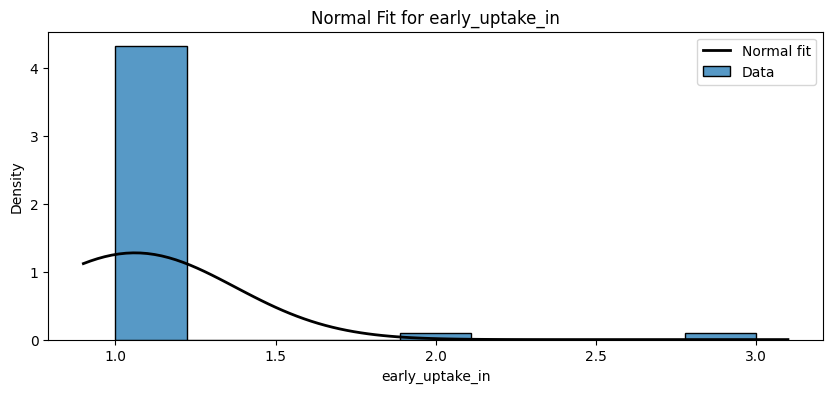

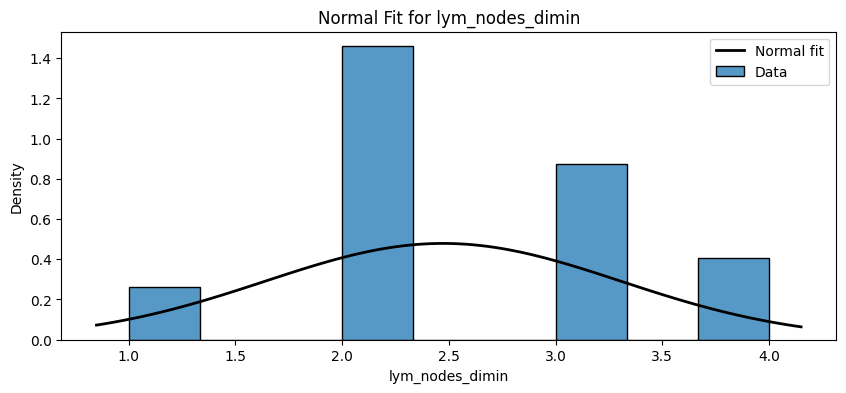

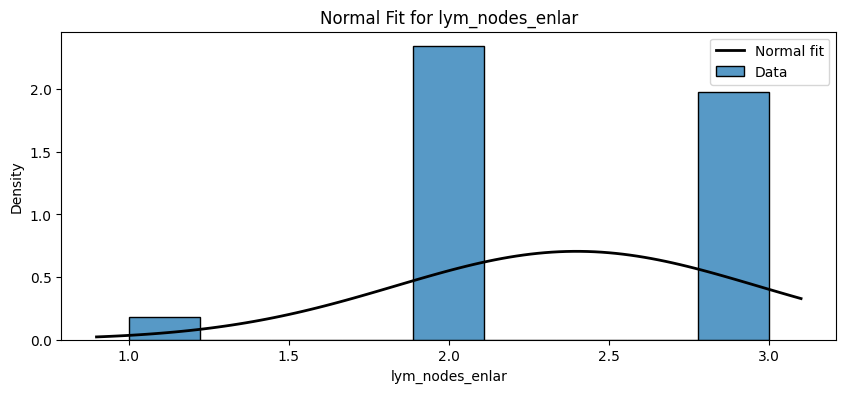

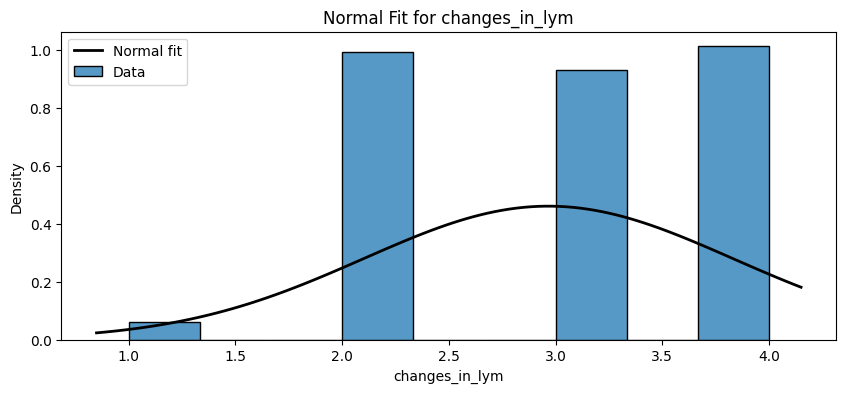

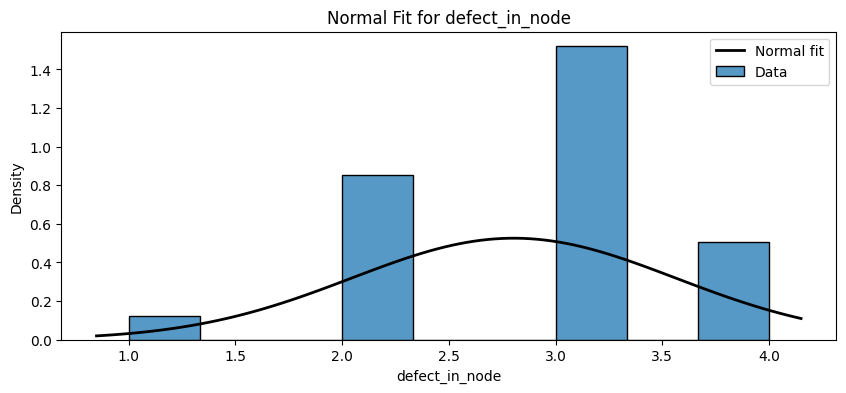

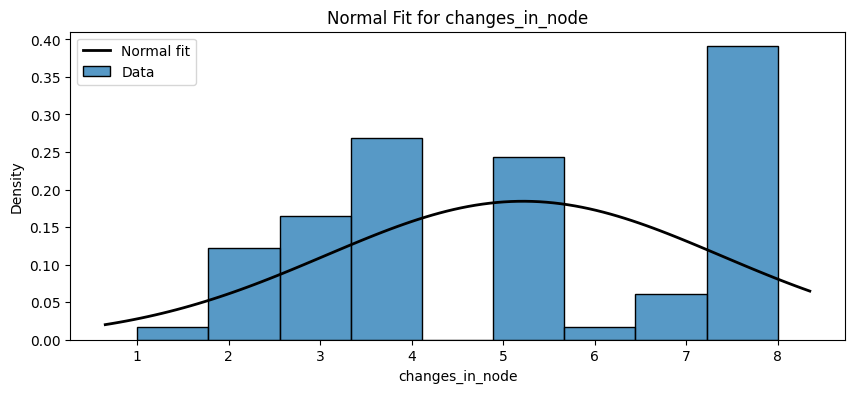

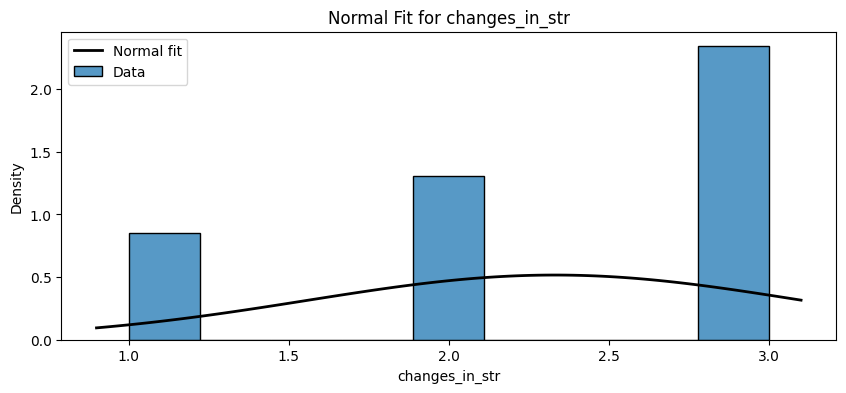

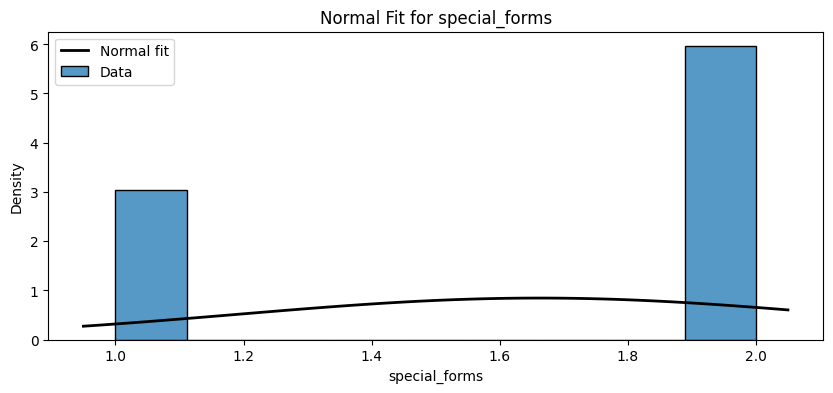

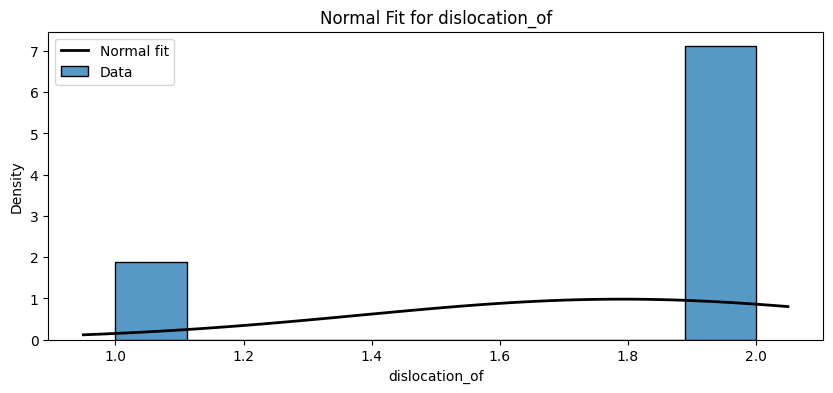

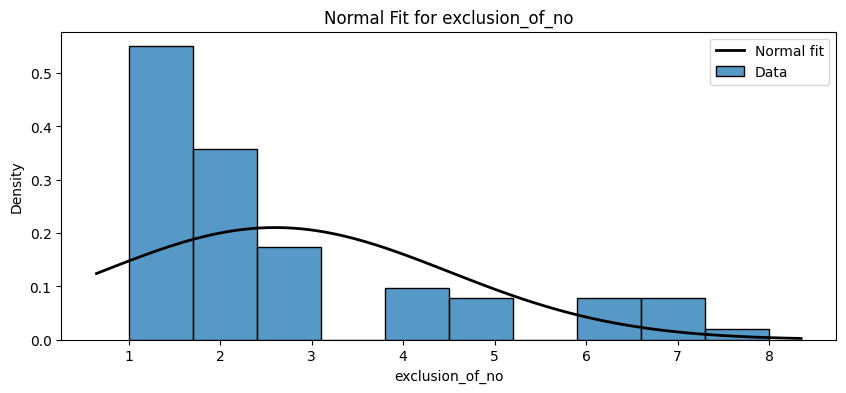

Best-fitting distribution for class: gamma
Best-fitting distribution for lymphatics: normal
Best-fitting distribution for block_of_affere: normal
Best-fitting distribution for bl_of_lymph_c: normal
Best-fitting distribution for bl_of_lymph_s: normal
Best-fitting distribution for by_pass: gamma
Best-fitting distribution for extravasates: normal
Best-fitting distribution for regeneration_of: gamma
Best-fitting distribution for early_uptake_in: normal
Best-fitting distribution for lym_nodes_dimin: gamma
Best-fitting distribution for lym_nodes_enlar: gamma
Best-fitting distribution for changes_in_lym: gamma
Best-fitting distribution for defect_in_node: normal
Best-fitting distribution for changes_in_node: gamma
Best-fitting distribution for changes_in_str: gamma
Best-fitting distribution for special_forms: normal
Best-fitting distribution for dislocation_of: normal
Best-fitting distribution for exclusion_of_no: normal


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

ds = 'lymphography.data'
columns = ['class', 'lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 
           'extravasates', 'regeneration_of', 'early_uptake_in', 'lym_nodes_dimin', 'lym_nodes_enlar', 
           'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_str', 'special_forms', 
           'dislocation_of', 'exclusion_of_no']
data = pd.read_csv(ds, names=columns)

for column in data.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

def fit_distribution(data, column):
    col_data = data[column].dropna()
    mu, std = stats.norm.fit(col_data)
    
    plt.figure(figsize=(10, 4))
    sns.histplot(col_data, kde=False, stat='density', label='Data')
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal fit')
    plt.title(f'Normal Fit for {column}')
    plt.legend()
    plt.show()
    
    return mu, std

for column in data.columns:
    fit_distribution(data, column)

def fit_and_compare_distributions(data, column):
    col_data = data[column].dropna()
    fits = {}
    
    mu, std = stats.norm.fit(col_data)
    fits['normal'] = {'params': (mu, std), 'cdf': lambda x: stats.norm.cdf(x, mu, std)}
    
    loc, scale = stats.expon.fit(col_data)
    fits['exponential'] = {'params': (loc, scale), 'cdf': lambda x: stats.expon.cdf(x, loc, scale)}
    
    a, loc, scale = stats.gamma.fit(col_data)
    fits['gamma'] = {'params': (a, loc, scale), 'cdf': lambda x: stats.gamma.cdf(x, a, loc, scale)}
    
    best_fit = None
    best_D = float('inf') 
    
    for dist_name, fit in fits.items():
        D, p_value = stats.kstest(col_data, fit['cdf'])
        
        if D < best_D:
            best_fit = dist_name
            best_D = D
    
    return best_fit

for column in data.columns:
    best_fit = fit_and_compare_distributions(data, column)
    print(f'Best-fitting distribution for {column}: {best_fit}')


#### 3. Create a summary statistics.

In [11]:
df = pd.read_csv(ds, names=columns)
summary_stats = df.describe()
print(summary_stats)

            class  lymphatics  block_of_affere  bl_of_lymph_c  bl_of_lymph_s  \
count  148.000000  148.000000       148.000000     148.000000     148.000000   
mean     2.743243    1.554054         1.175676       1.047297       1.243243   
std      0.817509    0.498757         0.381836       0.212995       0.430498   
min      1.000000    1.000000         1.000000       1.000000       1.000000   
25%      2.000000    1.000000         1.000000       1.000000       1.000000   
50%      3.000000    2.000000         1.000000       1.000000       1.000000   
75%      3.000000    2.000000         1.000000       1.000000       1.000000   
max      4.000000    2.000000         2.000000       2.000000       2.000000   

          by_pass  extravasates  regeneration_of  early_uptake_in  \
count  148.000000    148.000000       148.000000       148.000000   
mean     1.506757      1.067568         1.702703         1.060811   
std      0.501652      0.251855         0.458621         0.313557   
min

#### 4. Perform a hypothesis test (Code from scratch).

In [16]:
from scipy.stats import t

df = pd.read_csv(ds, names=columns)

null_mean = 5

sample_mean = df["block_of_affere"].mean()
sample_std = df["block_of_affere"].std()
n = len(df)

t_statistic = (sample_mean - null_mean) / (sample_std / (n**0.5))
degrees_of_freedom = n - 1

p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

print("Sample Mean:", sample_mean)
print("t-Statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("p-Value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Sample Mean: 1.1756756756756757
t-Statistic: -121.8452235911602
Degrees of Freedom: 147
p-Value: 0.0
Reject the null hypothesis.
